In [5]:
!pip install librosa

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display
import numpy as np

In [2]:
path = "D:\\Samples\\Test\\Unsifted\\2019\\Lo-FiHip-HopElements_TL\\Loops\\Melodic Loops\\85_Bm_Rhodes_01_TL.wav"
IPython.display.Audio(path)

In [4]:
# Librosa’s load function will read in the path to an audio file, and return a
# tuple with two items. The first item is an ‘audio time series’(type: array)
# corresponding to audio track. The second item in the tuple is the sampling
# rate that was used to process the audio.

data, sr = librosa.load(path, sr = None)
data.shape

(996141,)

# Display Parameters:
* data: this is a matrix to display
* y_axis/x_axis: what should be plotted on either axis
* frequency types

    `‘linear’, ‘fft’, ‘hz’ : frequency range is determined by the FFT window and sampling rate.
    ‘log’ : the spectrum is displayed on a log scale.
    ‘mel’ : frequencies are determined by the mel scale.
    ‘cqt_hz’ : frequencies are determined by the CQT scale.
    ‘cqt_note’ : pitches are determined by the CQT scale.`
   
    All frequency types are plotted in units of Hz.
   
* Categorical types:

   `‘chroma’ : pitches are determined by the chroma filters. Pitch classes are arranged at integer locations (0-11).
    ‘tonnetz’ : axes are labeled by Tonnetz dimensions (0-5)
    ‘frames’ : markers are shown as frame counts.`
   
* Time types:
    
    `‘s’ : markers are shown as seconds.
    ‘ms’ : markers are shown as milliseconds.
    ‘lag’ : like time, but past the halfway point counts as negative values.
    ‘lag_s’ : same as lag, but in seconds.
    ‘lag_ms’ : same as lag, but in milliseconds.`

# Melodic Spectrogram:


What is a mel spectrogram? Well first let’s start with the mel. A mel is a number that corresponds to a pitch, similar to how a frequency describes a pitch. If we consider a note, A4 for example, its frequency is 440 hz. If we move up an octave to A5 its frequency doubles to 880 hz, and doubles again to 1760 at A6. So thats a jump of 440 between the A4 and A5 and 880 between A5 and A6, but the problem is that the human ear doesn’t hear that way. The difference between two notes feels the same whether we jump from C to D or from F to G. But the logarithmic relationship gives different hz values for these different intervals. The term mel comes from the word ‘melodic’ and the mel scale is intended to regularize the intervals between notes. Unfortunately there does not seem to be one uniform mel scale. The code used by Librosa is a bit cryptic can be found here. In principle the mel is used to display pitch in a more regularized distribution.

[More on mel spectrograms](https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0 "Medium")

Librosa includes a function to exctract the power spectrogram (amplitude
squared) for each mel over time as well as a function for easy display of the
resulting mel spectrogram. This display function is not automatically
imported with librosa and must be imported on its own as such:

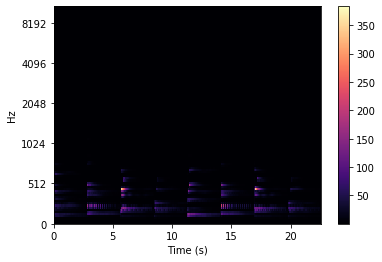

In [13]:
spec = librosa.feature.melspectrogram(y = data, sr = sr)
librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar()

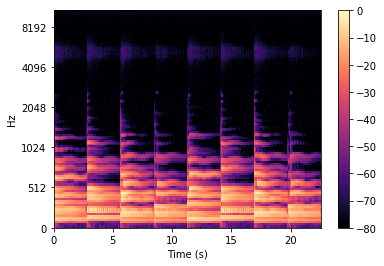

In [14]:
dec = librosa.power_to_db(spec,ref=np.max)
librosa.display.specshow(dec,y_axis = 'mel',x_axis = 's',sr=sr)
plt.colorbar();

# Harmonic percussive separation
The goal of Harmonic-percusive separation is to separate an audio signal into its harmonic and percussive sounds. This results in two new waveforms with each one being the desired signal.

in this case there are no percussive sounds but the code to do so would be:

```python
harmonic_data, percussive_data = librosa.effects.hpss(data)

spec_harmonic = librosa.feature.melspectrogram(harmonic_data, sr=sr)
spec_percussive = librosa.feature.melspectrogram(percussive_data, sr=sr)
db_spec_harmonic = librosa.power_to_db(spec_harmonic,ref=np.max)
db_spec_percussive = librosa.power_to_db(spec_percussive,ref=np.max)

librosa.display.specshow(db_spec_harmonic,y_axis = 'mel',x_axis = 's',sr=sr)
librosa.display.specshow(db_spec_percussive,y_axis = 'mel',x_axis = 's',sr=sr)
```

![alt text](https://miro.medium.com/max/384/1*1NonkTqEEcFWkryKnPINBA.png "Harmonic")
![alt text](https://miro.medium.com/max/384/1*OJiPcdon11SpSSiXIepLgQ.png "percussive")

# Chroma feature

In music, the term chroma feature or chromagram closely relates to the twelve different pitch classes. Chroma-based features, which are also referred to as "pitch class profiles", are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories).

One main property of chroma features is that they capture harmonic and melodic characteristics of music.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/ChromaFeatureCmajorScaleScoreAudioColor.png/800px-ChromaFeatureCmajorScaleScoreAudioColor.png "chromagram")

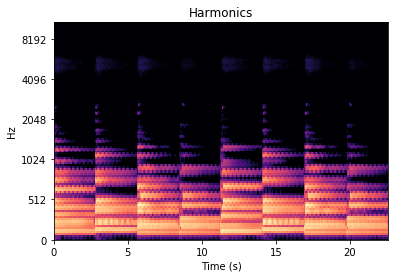

In [21]:
harmonic_data, percusive = librosa.effects.hpss(data)

spec_harmonic = librosa.feature.melspectrogram(harmonic_data, sr=sr)
db_spec_harmonic = librosa.power_to_db(spec_harmonic,ref=np.max)
plt.title("Harmonics")
librosa.display.specshow(db_spec_harmonic,y_axis = 'mel',x_axis = 's',sr=sr);

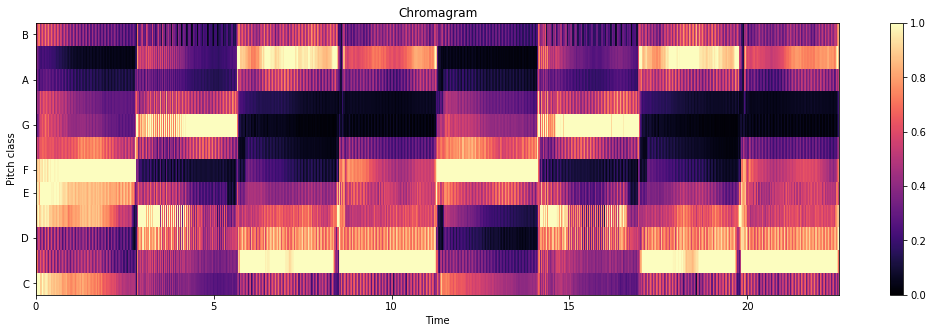

In [32]:
chroma = librosa.feature.chroma_cqt(y = harmonic_data,sr = sr)

plt.figure(figsize=(18,5))
librosa.display.specshow(chroma, sr=sr, x_axis = 'time',y_axis = 'chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar();

# How to save a visual

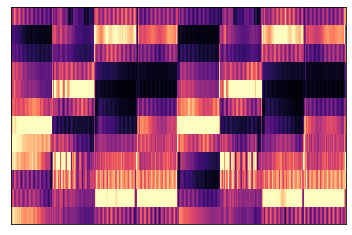

In [31]:
fig = plt.figure()
librosa.display.specshow(chroma, sr=sr, vmin=0, vmax=1)
fig.savefig('Images/Tests/chroma.png', bbox_inches='tight')

# Generate the images